In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import statistics
import os 
import scipy.stats as st

In [ ]:
#https://scikit-learn.org/stable/modules/naive_bayes.html

In [248]:
df=pd.read_csv("train_mob.csv")
df.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2


In [249]:
df=df[0:1000]

In [250]:
y=df["price_range"]
df=df[["blue","dual_sim","fc","four_g","m_dep","n_cores","three_g","touch_screen","wifi","ram","battery_power"]]
x=df.values

In [251]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1)
scores = cross_val_score(clf, x, y, cv=5)
clf.fit(x,y)
y_pre1=clf.predict(x)
scores

array([0.82178218, 0.80597015, 0.785     , 0.80904523, 0.79292929])

In [252]:
#from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()

In [253]:
scores = cross_val_score(gnb, x, y, cv=5)
scores

array([0.76732673, 0.76616915, 0.78      , 0.77889447, 0.79292929])

In [254]:
gnb.fit(x,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [255]:
y_pre3=gnb.predict(x)
df_pre=DataFrame([y_pre1,y_pre3,y],index=["SVC","NB","original"]).T

In [256]:
#without inbuilt

In [257]:
def  pi_pdf(x,yq,xp):
    a=[]
    for i in np.arange(len(x)):
        if df["price_range"][i]==yq:
            a=np.append(a,x[i]) 
    m=np.mean(a)
    v=np.var(a)
    z=(xp-m)/np.sqrt(v)
    pz=st.norm.cdf(z)
    return(pz)

In [258]:
#pi_pdf(df["battery_power"],1,625)

In [259]:
def pi_pmf(x,yq,xp):
    s=0
    for i in np.arange(len(x)):
        if y[i]==yq and x[i]==xp:
            s=s+1
    return(s/len(x))

In [260]:
pdf_y=[]
yq=y
for j in np.unique(yq):
    d=0
    for i in np.arange(len(y)):
        if y[i]==yq[j]:
            d=d+1
    pdf_y=np.append(pdf_y,d/len(y))

In [261]:
pdf_y

array([0.234, 0.248, 0.248, 0.248])

In [262]:
def post(e,yq):
    cl=df.columns[:-1]
    pp=1
    for i in np.arange(len(cl)):
        cl1=cl[i]
        x=df[cl1]
        xp=e[i]
        pp1=pi_pmf(x,yq,xp)
        pp=pp*pp1
    return(pp)

In [263]:
def post_pre(e):
    dfmx=DataFrame(columns=["p"])
    yq1=np.unique(y)
    for j in np.arange(len(yq1)):
        m=post(e,yq1[j]) 
        m2=m*pdf_y[j]
        #mx1=np.arange(mx1,m2)
        dfmx.loc[j] = m2 
    v=dfmx["p"].values
    return(np.argmax(v))

In [264]:
pred=(post_pre(df[1:2].values[0][:-1]))
pred

2

In [265]:
y_pre=[]
for i in np.arange(len(y)):
    pred=(post_pre(df[i:i+1].values[0]))
    y_pre=np.append(y_pre,pred)

In [266]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pre,y_pre1)

0.807

In [275]:
df_pre=DataFrame([y_pre,y_pre1,y],index=["bayes","SVC","observed"]).T

Text(0.5, 1.0, 'Bayesian vs SVM classification')

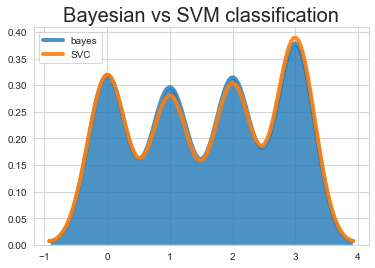

In [305]:
sns.kdeplot(df_pre["bayes"],shade=True,alpha=.8,linewidth=4)
sns.kdeplot(df_pre["SVC"],shade=False,alpha=.9,linewidth=4)
plt.title("Bayesian vs SVM classification",fontsize=20)

In [291]:
help(sns.kdeplot)

Help on function kdeplot in module seaborn.distributions:

kdeplot(data, data2=None, shade=False, vertical=False, kernel='gau', bw='scott', gridsize=100, cut=3, clip=None, legend=True, cumulative=False, shade_lowest=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, **kwargs)
    Fit and plot a univariate or bivariate kernel density estimate.
    
    Parameters
    ----------
    data : 1d array-like
        Input data.
    data2: 1d array-like, optional
        Second input data. If present, a bivariate KDE will be estimated.
    shade : bool, optional
        If True, shade in the area under the KDE curve (or draw with filled
        contours when data is bivariate).
    vertical : bool, optional
        If True, density is on x-axis.
    kernel : {'gau' | 'cos' | 'biw' | 'epa' | 'tri' | 'triw' }, optional
        Code for shape of kernel to fit with. Bivariate KDE can only use
        gaussian kernel.
    bw : {'scott' | 'silverman' | scalar | pair of scalars }, optional
     